# <center>Author:<font color='#a30'> Ziad Elsayed</font></center>
## <center>Task 4 : Global Terrorsim</center>
### <center><font color='green'>Main Objectives</font></center>
<center>● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’</center>

<center>● As a security/defense analyst, try to find out the hot zone of terrorism.</center>

<center>● What all security issues and insights you can derive by EDA?</center>



> ...


---


Author: ziad-elseyed.

Copyright ziad-elsayed, 2023

In [67]:
# @title <font color = 'orange'>Importing dataset from drive</font>
import pandas as pd

mydf = pd.read_csv('/content/drive/MyDrive/Global Terrorism - START data.zip',encoding='ISO-8859-1')
mydf.head()

<ipython-input-67-80792859ef37>:4: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [68]:
# @title <font color = 'orange'>Changing column names</font>
mydf.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [69]:
# @title <font color = 'orange'>Selecting important data in whole dataset those I'm using further processing.</font>

mydf=mydf[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [70]:
# @title <font color = 'orange'>Checking the null velues in data</font>

mydf.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [71]:
print("Country with the most attacks:",mydf['Country'].value_counts().idxmax())
print("City with the most attacks:",mydf['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",mydf['Region'].value_counts().idxmax())
print("Year with the most attacks:",mydf['Year'].value_counts().idxmax())
print("Month with the most attacks:",mydf['Month'].value_counts().idxmax())
print("Group with the most attacks:",mydf['Group'].value_counts().index[1])
print("Most Attack Types:",mydf['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


<ipython-input-72-5134bf75defb>:5: FutureWarning:

In a future version of pandas all arguments of Series.dropna will be keyword-only.



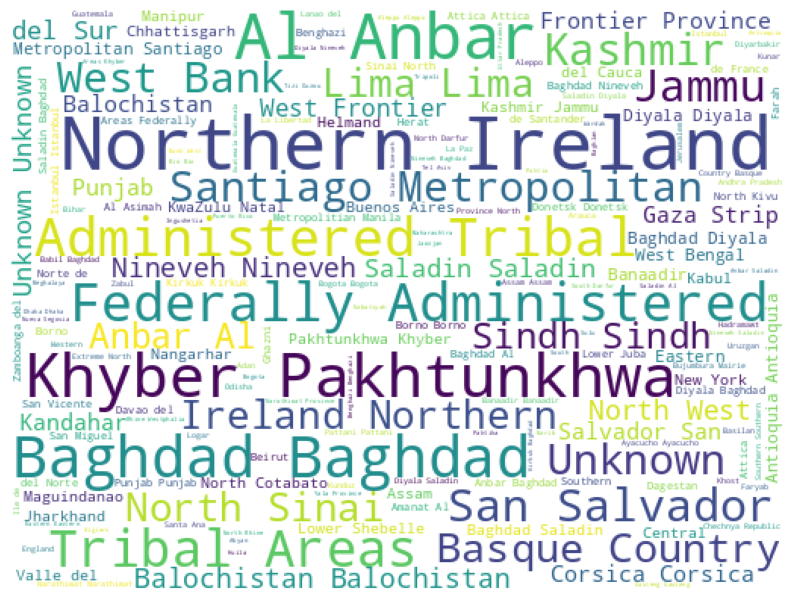

In [72]:
# @title <font color = 'orange'>The most frequent countries</font>
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from scipy import signal
cities = mydf.state.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

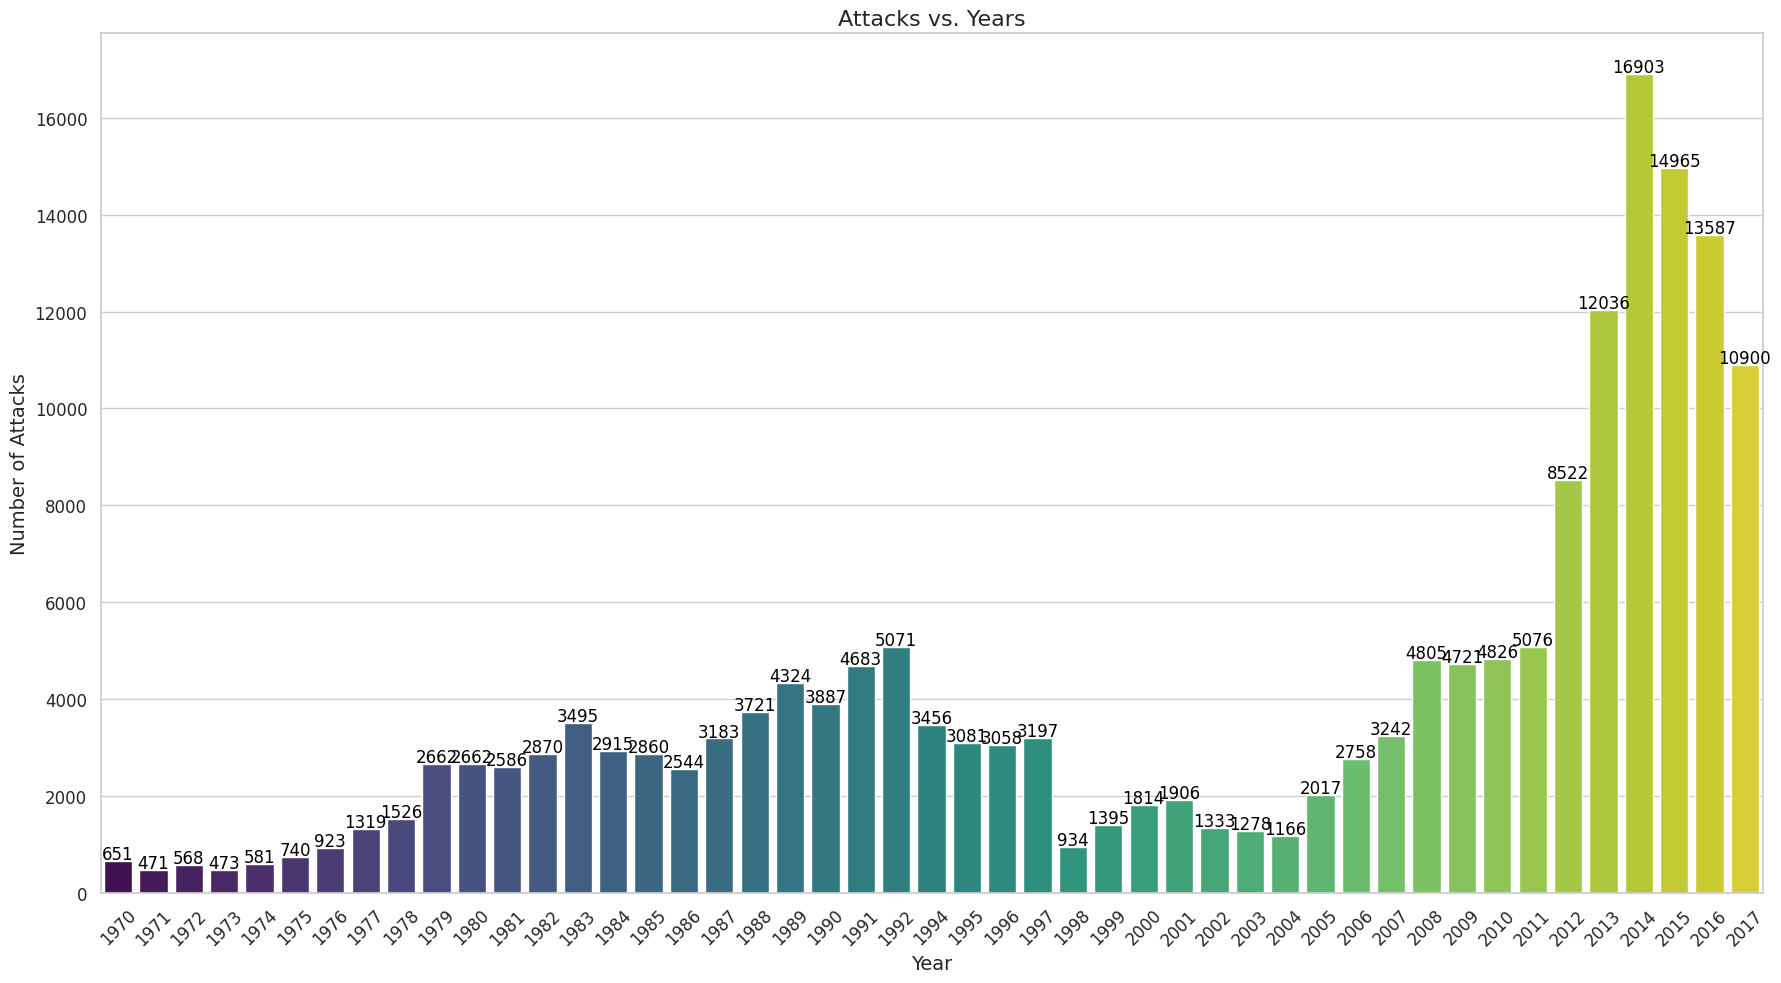

In [74]:
# @title <font color = 'orange'>Visualize The Number of Terrorist Activities each Year</font>
import seaborn as sns

x_year = mydf['Year'].unique()
y_count_years = mydf['Year'].value_counts(dropna=False).sort_index()

# Set the style and palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("viridis", len(x_year))

plt.figure(figsize=(18, 10))
ax = sns.barplot(x=x_year, y=y_count_years, palette=custom_palette)

# Add annotations for the counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.title('Attacks vs. Years', fontsize=16)
plt.tight_layout()
plt.show()


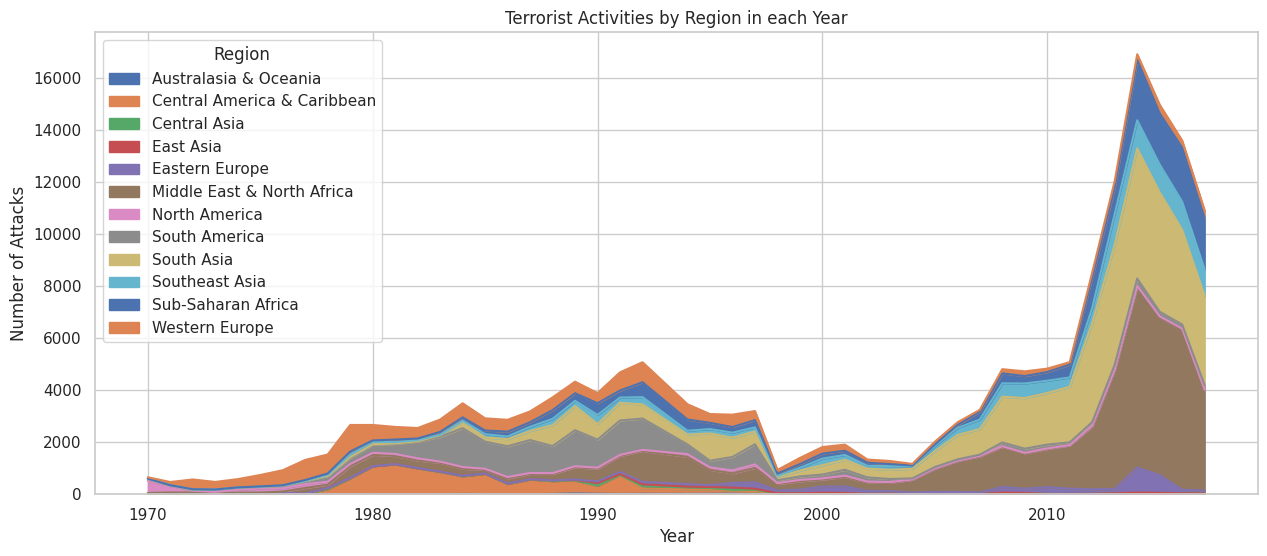

In [75]:
# @title <font color = 'orange'>Terrorist Activities by Region in each Year</font>
pd.crosstab(mydf.Year, mydf.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [76]:
mydf['Wounded'] = mydf['Wounded'].fillna(0).astype(int)
mydf['Killed'] = mydf['Killed'].fillna(0).astype(int)
mydf['casualities'] = mydf['Killed'] + mydf['Wounded']

In [77]:
# @title <font color = 'orange'>Values are sorted by the top 20 worst terror attacks</font>
t1 = mydf.sort_values(by='casualities',ascending=False)[:20]
heat=t1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()


Year,1982,1984,1992,1994,1995,1996,1998,2001,2004,2006,2007,2008,2014,2016,2017
Country,,,,,,,,,,,,,,,
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0,0.0,1261.5,1503.0,0.0
Japan,0.0,0.0,0.0,0.0,5513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
mydf.Country.value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

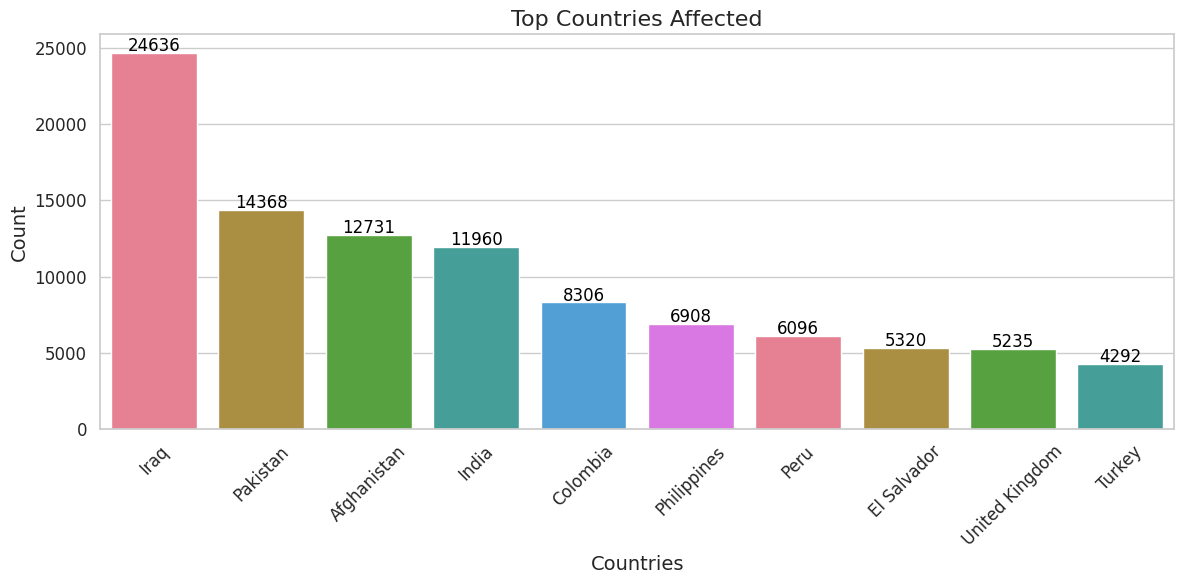

In [79]:
# @title <font color = 'orange'>Visualize Top 10 Countries Affected</font>

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mydf is your DataFrame containing the data
top_countries = mydf['Country'].value_counts()[:10]

# Set the style and palette
sns.set(style="whitegrid")
custom_palette = sns.color_palette("husl")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette=custom_palette)

# Add annotations for the counts above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Top Countries Affected', fontsize=16)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Ensure the labels and ticks fit in the figure
plt.show()




> ..



# <center><font color = 'white'>( The Spark Foundation )</font></center>
## <center><font color = 'gree'>Thank You 🌝</font></center>